In [14]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import statistics
import scipy.stats
import csv 
from fitter import Fitter, get_common_distributions, get_distributions
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [15]:
ruta_csv = 'student-por.csv'
df = pd.read_csv(ruta_csv, delimiter = ';')
dfc = df.drop(['address', 'famsize', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'traveltime','studytime', 'failures','schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'famrel', 'freetime', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2' ],axis=1)
print(dfc.head())

  school sex  age Pstatus guardian romantic  goout  G3
0     GP   F   18       A   mother       no      4  11
1     GP   F   17       T   father       no      3  11
2     GP   F   15       T   mother       no      2  12
3     GP   F   15       T   mother      yes      2  14
4     GP   F   16       T   father       no      2  13


# DEPURACIÓN
Se eliminan las variables que no pensamos considerar en el analisis inicial.

## Variables utilizadas

>**Nombre Variable** : school , **Tipo** : Categórica nominativa  , **Descripción** : Escuela del estudiante (binaria: 'GP' - Gabriel Pereira o 'MS' - Mousinho da Silveira).

>**Nombre Variable** : sex , **Tipo** : Categórica nominativa , **Descripción** : Género del estudiante (binario: 'F' - femenino o 'M' - masculino).

>**Nombre Variable** : age , **Tipo** :Cuantitativa Discreta , **Descripción** : Edad del estudiante (numérica: de 15 a 22).

>**Nombre Variable** : Pstatus , **Tipo** : Categórica nominativa , **Descripción** : Estado de convivencia de los padres (binario: 'T' - viviendo juntos o 'A' - separados).

>**Nombre Variable** : guardian , **Tipo** : Categórica nominativa , **Descripción** : Tutor del estudiante (nominal: 'madre', 'padre' u 'otro').

>**Nombre Variable** : romantic , **Tipo** : Categórica nominativa , **Descripción** : Con una relación romántica (binario: sí o no).

>**Nombre Variable** : goout , **Tipo** : Cuantitativa Discreta , **Descripción** : Salir con amigos (numérico: de 1 - muy bajo a 5 - muy alto).

>**Nombre Variable** : G3	 , **Tipo** : Cuantitativa Discreta , **Descripción** : Nota final (numérica: de 0 a 20).

In [16]:
dfc.describe()

,age,goout,G3
count,649.000000,649.000000,649.000000
mean,16.744222,3.184900,11.906009
std,1.218138,1.175766,3.230656
min,15.000000,1.000000,0.000000
25%,16.000000,2.000000,10.000000
50%,17.000000,3.000000,12.000000
75%,18.000000,4.000000,14.000000
max,22.000000,5.000000,19.000000


# Medidas posición y dispersión goout (Muestra)
> La media de la muestra es 3.185 aproximadamente y con una desviación típica presente ,en este caso, alrededor de 1.18, lo que indica que los valores de salir con amigos tienden a variar en 1.18 unidades con respecto a la media.
> El valor mínimo observado es 1, indicando que algunos estudiantes tienen un nivel muy bajo de salir con amigos.
> El 25% de los estudiantes tienen un nivel de salir con amigos igual o inferior a 2
> En este caso, el 50% de los estudiantes tienen un nivel de salir con amigos igual o inferior a 3 (Mediana)
> El 75% de los estudiantes tienen un nivel de salir con amigos igual o inferior a 4

# Medidas posición y dispersión G3 (Muestra)
> La media de la muestra es 11.906 aproximadamente y con una desviación típica presente ,en este caso, alrededor de 3.230, lo que indica que las notas finales tienden a variar en 3.230 unidades con respecto a la media.
> El valor mínimo observado es 0, lo que sugiere que algunos estudiantes han obtenido la calificación mínima posible.
> El 25% de los estudiantes tienen una nota final igual o inferior a 10
> En este caso, el 50% de los estudiantes tienen una nota final igual o inferior a 12 (Mediana)
> El 75% de los estudiantes tienen una nota final igual o inferior a 14
> El valor máximo observado es 19, indicando que ningún estudiantes ha obtenido la calificación máxima posible

# CREACIÓN SUBMUESTRAS
>Separamos los datos de nuestra muestra por Hombres/Mujeres y por centros de estudios para comprobar si las medidas de posición y dispersión muestrales se comportan igual en los diferentes subgrupos.

In [17]:
dfcF = dfc[dfc['sex'] == 'F']
dfcM = dfc[dfc['sex'] == 'M']
dfcGP = dfc[dfc['school']=='GP']
dfcMS = dfc[dfc['school']=='MS']

In [18]:
dfcF.describe()

,age,goout,G3
count,383.000000,383.000000,383.000000
mean,16.788512,3.127937,12.253264
std,1.175524,1.158546,3.124147
min,15.000000,1.000000,0.000000
25%,16.000000,2.000000,10.000000
50%,17.000000,3.000000,12.000000
75%,18.000000,4.000000,14.000000
max,21.000000,5.000000,19.000000


>Las mujeres tienen una nota media ligeramente superior a la media muestral 0.347 y menor desviación respecto a la media
> Salen de media un poco menos -0.570 y tienen una menor desviación respecto a la media

In [19]:
dfcM.describe()

,age,goout,G3
count,266.000000,266.000000,266.000000
mean,16.680451,3.266917,11.406015
std,1.276550,1.197559,3.320690
min,15.000000,1.000000,0.000000
25%,16.000000,2.000000,10.000000
50%,17.000000,3.000000,11.000000
75%,18.000000,4.000000,13.000000
max,22.000000,5.000000,19.000000


> Los hombres tienen una media ligeramente inferior a la media muestral-0.500 y una mayor desviación respecto a la media
> Los hombres salen con sus amigos de media mas que el total muestral 0.820 y presentan una desviación respecto a la media mayor.

In [20]:
dfcGP.describe()

,age,goout,G3
count,423.000000,423.000000,423.000000
mean,16.666667,3.146572,12.576832
std,1.244895,1.152899,2.625636
min,15.000000,1.000000,0.000000
25%,16.000000,2.000000,11.000000
50%,17.000000,3.000000,13.000000
75%,18.000000,4.000000,14.000000
max,22.000000,5.000000,19.000000


>Los estudiantes del colegio Gabriel Pereira tienen una media mayor a la media muestral 0.670 y una menor desviación
>Los estuandites del colegio Gabriel Pereira salen con sus amigos de media menos que el total muestral en concreto un -0.380 y presentan una menor desviación respecto de la media


In [21]:
dfcMS.describe()

,age,goout,G3
count,226.000000,226.000000,226.000000
mean,16.889381,3.256637,10.650442
std,1.155152,1.216763,3.833991
min,15.000000,1.000000,0.000000
25%,16.000000,2.000000,9.000000
50%,17.000000,3.000000,11.000000
75%,18.000000,4.000000,13.000000
max,20.000000,5.000000,19.000000


>Los estudiantes del colegio Mousinho da Silveira tienen una media menor a la media muestral en -1.256 puntos y una desviación mayor.
>Los estudiantes del colegio Mousinho da Silveira salen de media mas que el total de la muestra en 0.720 puntos y presentan una desviación mayor.

## Bivariante

In [22]:
x = dfc['goout']
y = dfc['G3']
covariance = np.cov(x, y)[0, 1]

print(f'Covarianza entre goout y G3: {covariance}')

correlation_matrix = np.corrcoef(x, y)

correlation = correlation_matrix[0, 1]

print(f'Correlación entre goout y G3: {correlation}')

Covarianza entre goout y G3: -0.3329029466035112
Correlación entre goout y G3: -0.08764072272424217


Hemos estudiado la covarianza y la correlación entre las variables 'goout' (representando el tiempo social) y 'G3' (las notas finales).

# Covarianza:
>Primero, calculamos la covarianza entre estas dos variables, obteniendo un valor de aproximadamente -0.333. Esta medida indica una relación inversa entre el tiempo dedicado a actividades sociales y las notas finales. Específicamente, cuando el tiempo social disminuye, las notas finales tienden a ser más altas, y viceversa. No obstante, la covarianza no proporciona detalles sobre la fuerza o magnitud exacta de esta relación.

# Correlación:
>Para obtener una perspectiva más detallada, calculamos la correlación normalizada entre 'goout' y 'G3'. El resultado fue de aproximadamente -0.0876. Este valor cercano a cero indica una correlación débil y sugiere que no existe una relación lineal fuerte entre el tiempo social y las notas finales. Además, al ser negativo, la correlación indica una tendencia leve hacia una relación inversa, aunque esta asociación es bastante débil.

>En resumen, los resultados indican que hay una relación inversa leve entre el tiempo social y las notas finales, pero la debilidad de la correlación sugiere que otros factores pueden estar influyendo significativamente en el rendimiento académico de los estudiantes.

In [23]:
frequency_table = pd.crosstab(index=df['romantic'], columns="count")
frequency_table['percentage'] = (frequency_table / frequency_table.sum()) * 100

print(frequency_table)

col_0     count  percentage
romantic                   
no          410   63.174114
yes         239   36.825886


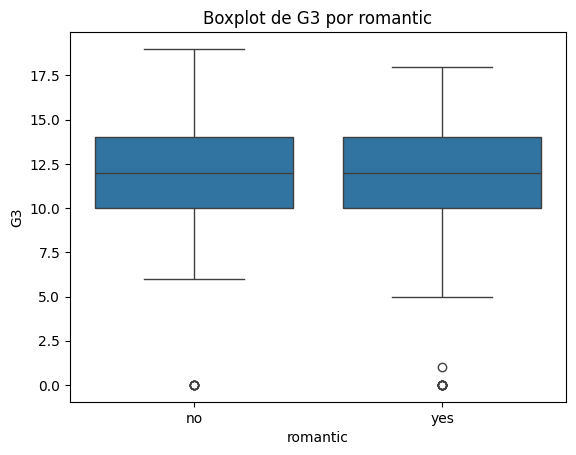

In [24]:
sns.boxplot(x='romantic', y='G3', data=df)
plt.title('Boxplot de G3 por romantic')
plt.show()

In [25]:

# Configuración del gráfico de densidad
plt.figure(figsize=(12, 8))

variable_x = 'G3'
for subset, label, color in zip(subsets, labels, colors):
    sns.kdeplot(subset[variable_x], label=label, color=color)

# Configuración de leyendas y título
plt.title(f'Gráfico de Densidad de {variable_x} en diferentes subconjuntos')
plt.xlabel(variable_x)
plt.ylabel('Densidad')
plt.legend()
plt.show()


NameError: name 'subsets' is not defined

<Figure size 1200x800 with 0 Axes>

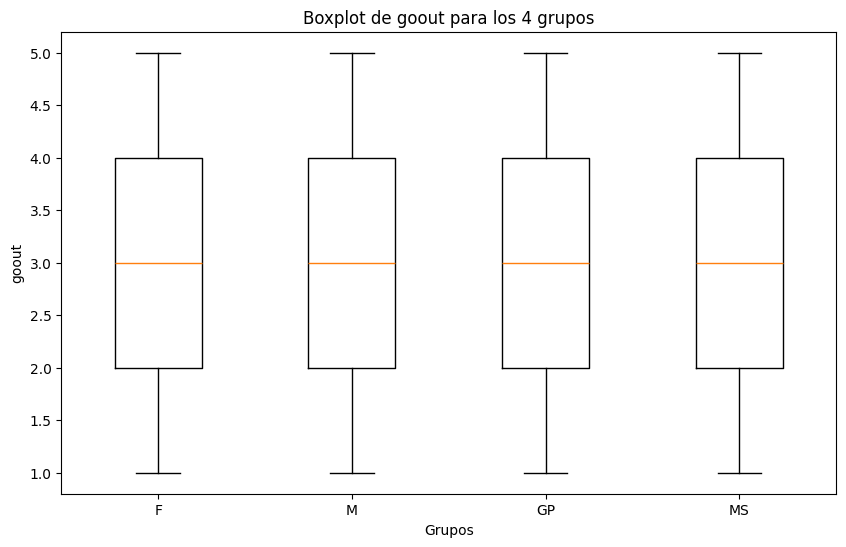

In [ ]:
dataframes = [dfcF, dfcM, dfcGP, dfcMS]
labels = ['F', 'M', 'GP', 'MS']


variable_y = 'goout'

# Crear el boxplot para cada DataFrame
plt.figure(figsize=(10, 6))
plt.boxplot([df[variable_y] for df in dataframes], labels=labels)
plt.title(f'Boxplot de {variable_y} para los 4 grupos')
plt.xlabel('Grupos')
plt.ylabel(variable_y)
plt.show()

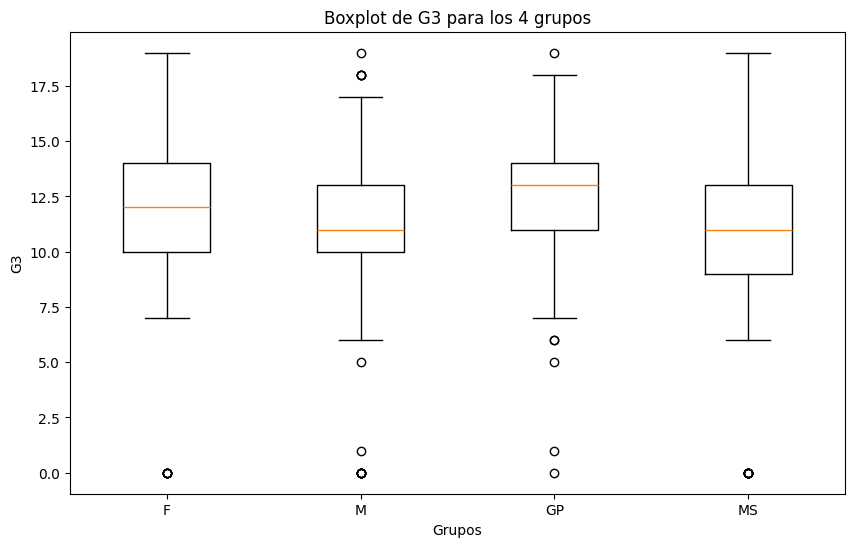

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd



dataframes = [dfcF, dfcM, dfcGP, dfcMS]
labels = ['F', 'M', 'GP', 'MS']


variable_y = 'G3'

# Crear el boxplot para cada DataFrame
plt.figure(figsize=(10, 6))
plt.boxplot([df[variable_y] for df in dataframes], labels=labels)
plt.title(f'Boxplot de {variable_y} para los 4 grupos')
plt.xlabel('Grupos')
plt.ylabel(variable_y)
plt.show()


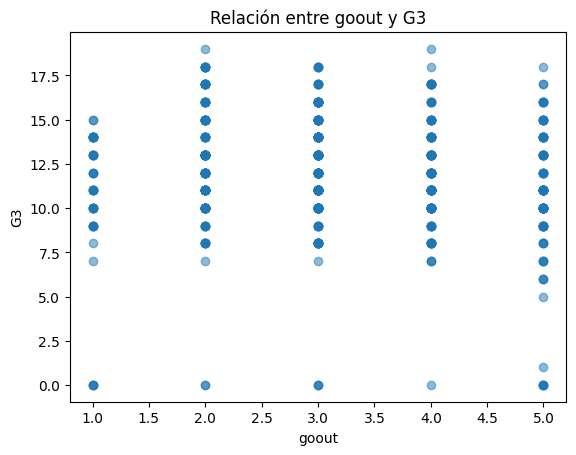

In [26]:


# Suponiendo que ya has leído el DataFrame df desde el archivo CSV

# Selecciona las variables de interés
variable_x = 'goout'
variable_y = 'G3'

# Crea el gráfico de dispersión
plt.scatter(dfc[variable_x], dfc[variable_y], alpha=0.5)
plt.title(f'Relación entre {variable_x} y {variable_y}')
plt.xlabel(variable_x)
plt.ylabel(variable_y)
plt.show()

# INFERENCIA

## Estudio normalidad G3

In [ ]:
scipy.stats.normaltest(dfc['G3'])

NormaltestResult(statistic=114.20475535916196, pvalue=1.5876416009730048e-25)

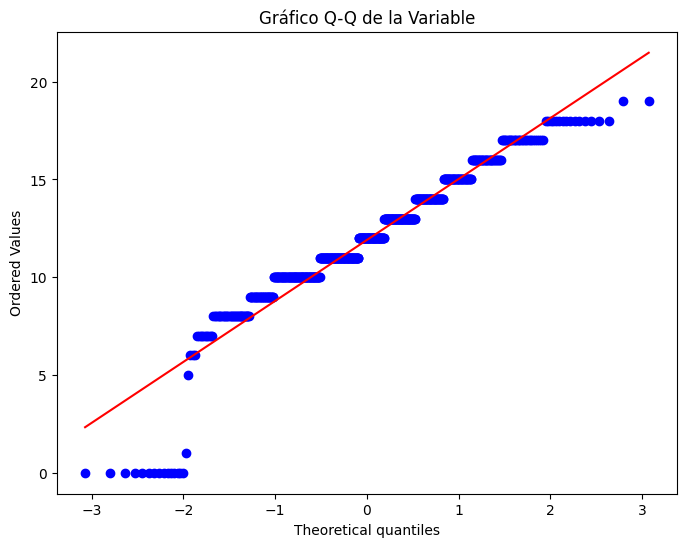

In [ ]:
import scipy.stats as stats
import matplotlib.pyplot as plt

# Supongamos que 'data' es tu variable de interés
data = dfc['G3']

# Configuración del gráfico Q-Q
plt.figure(figsize=(8, 6))
stats.probplot(data, dist="norm", plot=plt)
plt.title('Gráfico Q-Q de la Variable')
plt.show()

In [ ]:
from scipy.stats import shapiro

data = dfc['G3']

# Realizar la prueba de Shapiro-Wilk
stat, p_value = shapiro(data)

print(f'Estadístico de prueba: {stat}')
print(f'Valor p: {p_value}')

Estadístico de prueba: 0.9259809367060796
Valor p: 2.4159862607742608e-17


In [ ]:
from scipy.stats import anderson


data = dfc['G3']

# Realizar la prueba de Anderson-Darling
result = anderson(data)

print(f'Estadístico de prueba: {result.statistic}')
print(f'Valores críticos: {result.critical_values}')
print(f'Niveles de significancia: {result.significance_level}')

Estadístico de prueba: 8.233576677118435
Valores críticos: [0.573 0.652 0.782 0.912 1.085]
Niveles de significancia: [15.  10.   5.   2.5  1. ]


## Estudio normalidad goout

In [ ]:
scipy.stats.normaltest(dfc['goout'])

NormaltestResult(statistic=70.5973250516152, pvalue=4.677196827985334e-16)

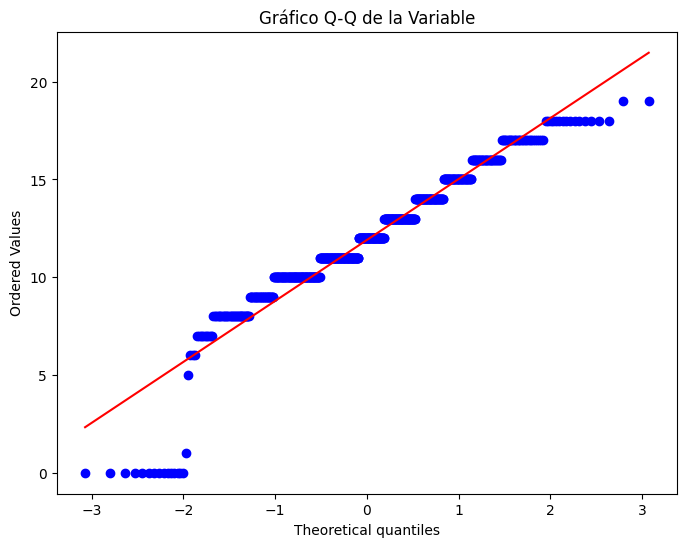

In [ ]:
import scipy.stats as stats
import matplotlib.pyplot as plt

# Supongamos que 'data' es tu variable de interés
data = dfc['G3']

# Configuración del gráfico Q-Q
plt.figure(figsize=(8, 6))
stats.probplot(data, dist="norm", plot=plt)
plt.title('Gráfico Q-Q de la Variable')
plt.show()

In [ ]:
from scipy.stats import shapiro

data = dfc['G3']

# Realizar la prueba de Shapiro-Wilk
stat, p_value = shapiro(data)

print(f'Estadístico de prueba: {stat}')
print(f'Valor p: {p_value}')

Estadístico de prueba: 0.9259809367060796
Valor p: 2.4159862607742608e-17


In [ ]:
from scipy.stats import anderson


data = dfc['G3']

# Realizar la prueba de Anderson-Darling
result = anderson(data)

print(f'Estadístico de prueba: {result.statistic}')
print(f'Valores críticos: {result.critical_values}')
print(f'Niveles de significancia: {result.significance_level}')

Estadístico de prueba: 8.233576677118435
Valores críticos: [0.573 0.652 0.782 0.912 1.085]
Niveles de significancia: [15.  10.   5.   2.5  1. ]


# Anova para romantic y G3

In [ ]:
model = ols('G3 ~ romantic', data=dfc).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)

               sum_sq     df         F    PR(>F)
romantic    55.494352    1.0  5.352723  0.021002
Residual  6707.772211  647.0       NaN       NaN


## Interpretación de la tabla ANOVA:

>Sum_sq (Suma de cuadrados):
La suma de cuadrados asociada con la variable romantic es 55.494352.
La suma de cuadrados residual (error) es 6707.772211.
df (grados de libertad):
Hay 1 grado de libertad asociado con la variable romantic.
Hay 647 grados de libertad residuales (error).
F (Estadística F):
El valor de la estadística F es 5.352723.
PR(>F) (Valor p):
El valor p es 0.021002.
Interpretación del valor p (PR(>F)):

>El valor p (0.021002) es menor que el nivel de significancia común de 0.05.
Esto sugiere que hay evidencia estadística significativa para rechazar la hipótesis nula de que no hay efecto de la variable romantic en la variable dependiente G3.
Interpretación de la estadística F:

>La estadística F compara la variabilidad explicada por la variable romantic con la variabilidad no explicada (residual).
    Un valor F grande sugiere que la variable romantic está teniendo un efecto significativo en la variable G3.

## Conclusiones:

>La variable romantic parece tener un impacto significativo en la variable dependiente G3, según el análisis de ANOVA.
La relación entre estas dos variables es estadísticamente significativa.


>En resumen, según el análisis de ANOVA, hay evidencia estadística para sugerir que la variable romantic tiene un impacto significativo en la variable G3.